<a href="https://colab.research.google.com/github/RANJAN4020/hello-world/blob/master/Capstone_RS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install ucimlrepo

In [2]:
#Load libraries and the dataset
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

from ucimlrepo import fetch_ucirepo

# fetch dataset
df1= fetch_ucirepo(id=890)
df=df1.data

# data (as pandas dataframes)
Z=df.original
X=df.features
y=df.targets
w=df.ids

# metadata
print(df1.metadata)

# variable information
print(df1.variables)

{'uci_id': 890, 'name': 'AIDS Clinical Trials Group Study 175', 'repository_url': 'https://archive.ics.uci.edu/dataset/890/aids+clinical+trials+group+study+175', 'data_url': 'https://archive.ics.uci.edu/static/public/890/data.csv', 'abstract': 'The AIDS Clinical Trials Group Study 175 Dataset contains healthcare statistics and categorical information about patients who have been diagnosed with AIDS. This dataset was initially published in 1996. The prediction task is to predict whether or not each patient died within a certain window of time or not. ', 'area': 'Health and Medicine', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Tabular', 'Multivariate'], 'num_instances': 2139, 'num_features': 23, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Sexual Orientation', 'Race', 'Gender'], 'target_col': ['cid'], 'index_col': ['pidnum'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1996, 'last_updated': 'Fri Nov 

In [3]:
# Print headers
print("First few rows of the DataFrame:")
Z.head()


First few rows of the DataFrame:


,pidnum,cid,time,trt,age,wtkg,hemo,homo,drugs,karnof,...,gender,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820
0,10056,0,948,2,48,89.8128,0,0,0,100,...,0,0,1,0,1,0,422,477,566,324
1,10059,1,1002,3,61,49.4424,0,0,0,90,...,0,1,3,0,1,0,162,218,392,564
2,10089,0,961,3,45,88.4520,0,1,1,90,...,1,1,3,0,1,1,326,274,2063,1893
3,10093,0,1166,3,47,85.2768,0,1,0,100,...,1,1,3,0,1,0,287,394,1590,966
4,10124,0,1090,0,43,66.6792,0,1,0,100,...,1,1,3,0,0,0,504,353,870,782


In [4]:
#Check the dimension of  dataframe
print("DataFrame shape:")
print(Z.shape)

DataFrame shape:
(2139, 25)


In [5]:
#List the variables in the daaset
headers=df.headers
print("List of Variables")
print(headers)

#print("List of Response Variables")
#print()

List of Variables
Index(['pidnum', 'cid', 'time', 'trt', 'age', 'wtkg', 'hemo', 'homo', 'drugs',
       'karnof', 'oprior', 'z30', 'zprior', 'preanti', 'race', 'gender',
       'str2', 'strat', 'symptom', 'treat', 'offtrt', 'cd40', 'cd420', 'cd80',
       'cd820'],
      dtype='object')


In [6]:
# List Variable types
# Display the data type of each column in the dataframe
print("Variables data types:")
print(Z.dtypes)

Variables data types:
pidnum       int64
cid          int64
time         int64
trt          int64
age          int64
wtkg       float64
hemo         int64
homo         int64
drugs        int64
karnof       int64
oprior       int64
z30          int64
zprior       int64
preanti      int64
race         int64
gender       int64
str2         int64
strat        int64
symptom      int64
treat        int64
offtrt       int64
cd40         int64
cd420        int64
cd80         int64
cd820        int64
dtype: object


In [7]:
# 5. Check missing values
# Count the number of missing values in each column
print("Missing values count:")
print(Z.isnull().sum())

Missing values count:
pidnum     0
cid        0
time       0
trt        0
age        0
wtkg       0
hemo       0
homo       0
drugs      0
karnof     0
oprior     0
z30        0
zprior     0
preanti    0
race       0
gender     0
str2       0
strat      0
symptom    0
treat      0
offtrt     0
cd40       0
cd420      0
cd80       0
cd820      0
dtype: int64


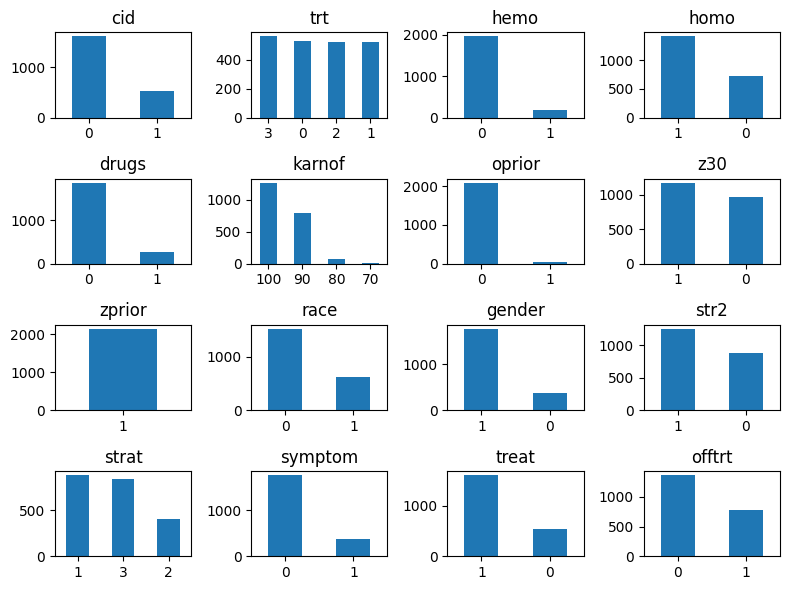

In [8]:
# DISTRIBUTION AND CLASS OF CATERORICAL VARIABLES

import math
from matplotlib import pyplot as plt

Z_catg=Z[['cid', 'trt', 'hemo', 'homo', 'drugs',  'karnof', 'oprior', 'z30', 'zprior',
           'race', 'gender','str2', 'strat', 'symptom', 'treat', 'offtrt']]
size = math.ceil(Z_catg.shape[1]** (1/2))
fig = plt.figure(figsize=(8,6))

for i, col in enumerate(Z_catg):
    #fig.add_subplot(size, size, i + 1)
    fig.add_subplot(4,4,i + 1)
    #Z_catg[col].value_counts().plot(kind="bar", title=col, rot=0)
    Z_catg[col].value_counts().plot(kind="bar", ax=plt.gca(), title=col, rot=0)

fig.tight_layout()

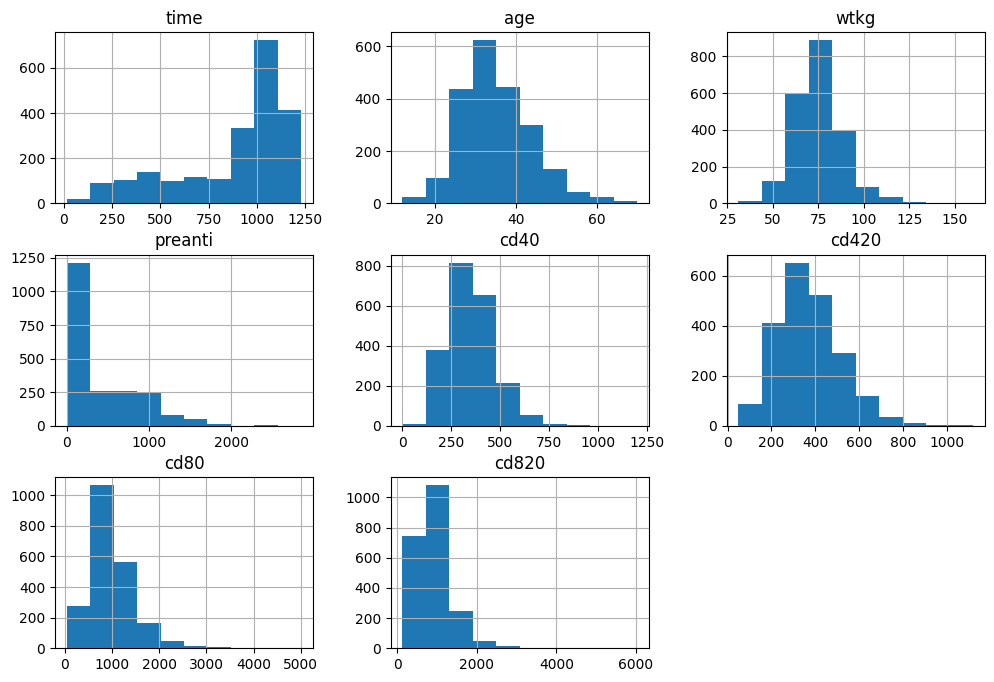

In [9]:
#DISTRIBUTION OF CONTINUOUS VARIABLES

X2=Z[["time","age","wtkg","preanti","cd40","cd420","cd80","cd820"]]
ax=X2.hist(bins=10,figsize=(12,8))


In [ ]:
# CORRELATION COEFFICIENT BETWEEN CONTINUOUS VARIABLES

# Excluded numeric categorical variables
X2=X[["time","age","wtkg","preanti","cd40","cd420", "cd80", "cd820"]]
print("Correlation matrix:")
print(X2.corr())

Correlation matrix:
             time       age      wtkg   preanti      cd40     cd420      cd80  \
time     1.000000  0.026544  0.009225  0.007249  0.191436  0.350611 -0.017425   
age      0.026544  1.000000  0.132858  0.113220 -0.040302 -0.044294  0.046874   
wtkg     0.009225  0.132858  1.000000 -0.079292  0.036401  0.020980  0.090075   
preanti  0.007249  0.113220 -0.079292  1.000000 -0.067495 -0.132213  0.037500   
cd40     0.191436 -0.040302  0.036401 -0.067495  1.000000  0.583578  0.214274   
cd420    0.350611 -0.044294  0.020980 -0.132213  0.583578  1.000000  0.054165   
cd80    -0.017425  0.046874  0.090075  0.037500  0.214274  0.054165  1.000000   
cd820    0.032480  0.037458  0.085447  0.023221  0.073039  0.216472  0.756218   

            cd820  
time     0.032480  
age      0.037458  
wtkg     0.085447  
preanti  0.023221  
cd40     0.073039  
cd420    0.216472  
cd80     0.756218  
cd820    1.000000  


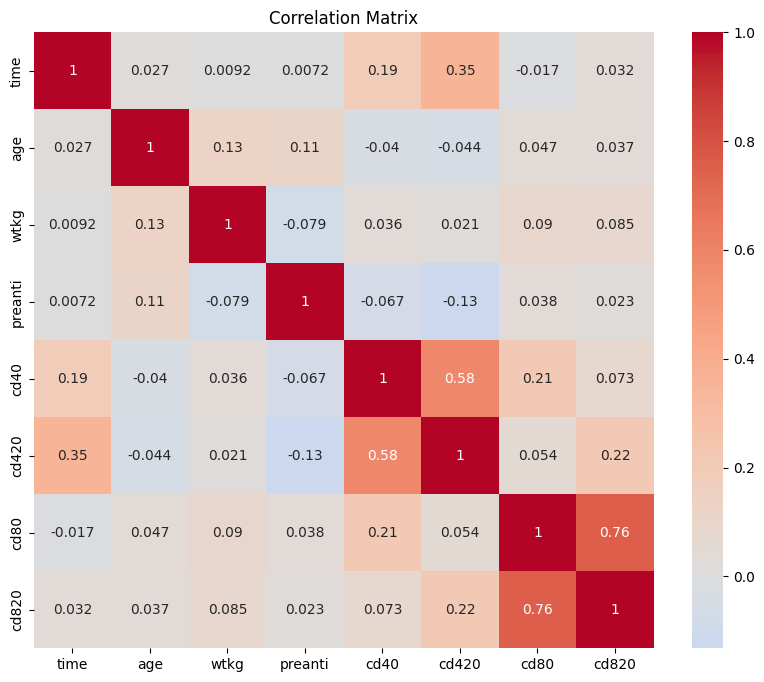

In [ ]:
# HEATMAP OF CORRELATION MATRIX FOR CONTINUOUS VARIABLES

# Calculate the correlation matrix
correlation_matrix = X2.corr()

# Create a heatmap
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

In [11]:
# HEATMAP OF CORRELATION MATRIX FOR All VARIABLES

# Calculate the correlation matrix
correlation_matrix = X.corr()
mask_corr = correlation_matrix[(correlation_matrix >= 0.25) | (correlation_matrix <= -0.25)]

# Create a heatmap
#plt.figure(figsize=(10,8))
#sns.heatmap(mask_corr , annot=True, cmap='coolwarm', center=0)
#plt.title('Correlation Matrix: All Variables')
#plt.show()

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

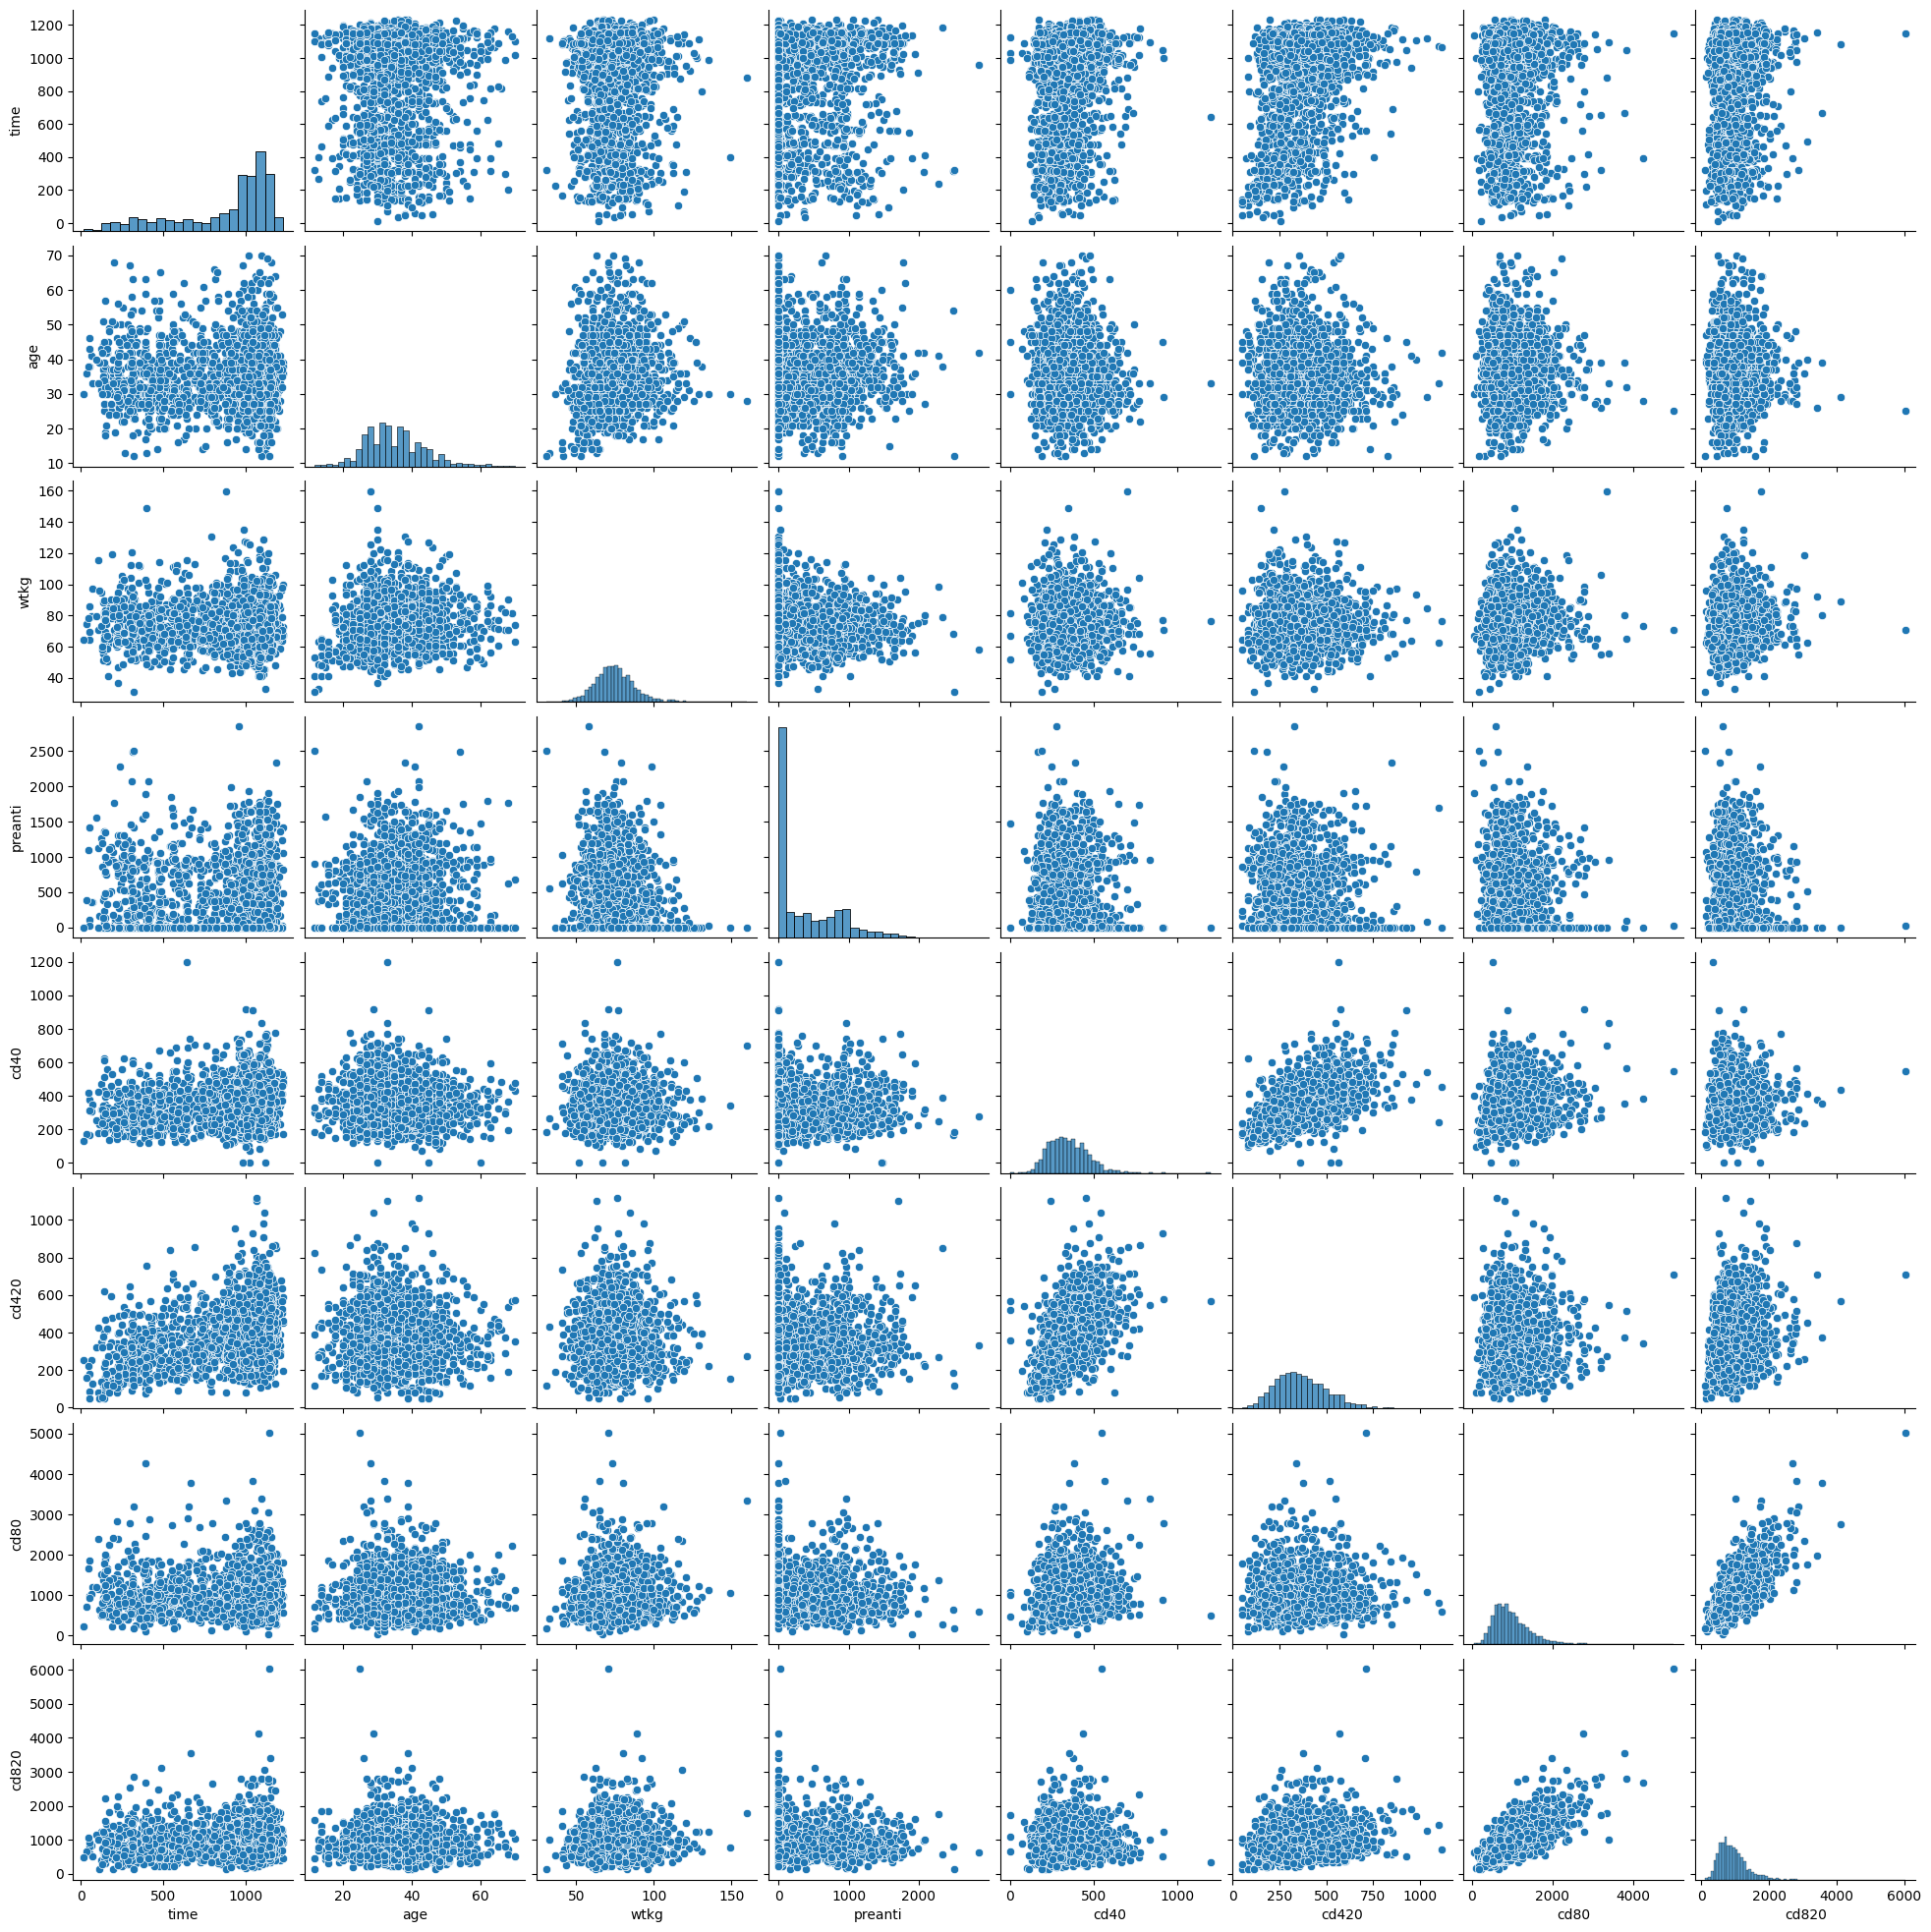

In [ ]:
# PAIRPLOT FOR CONTINUOUS VARIABLES

plt.figure(figsize=(10,8))
sns.pairplot(X2)
plt.show()

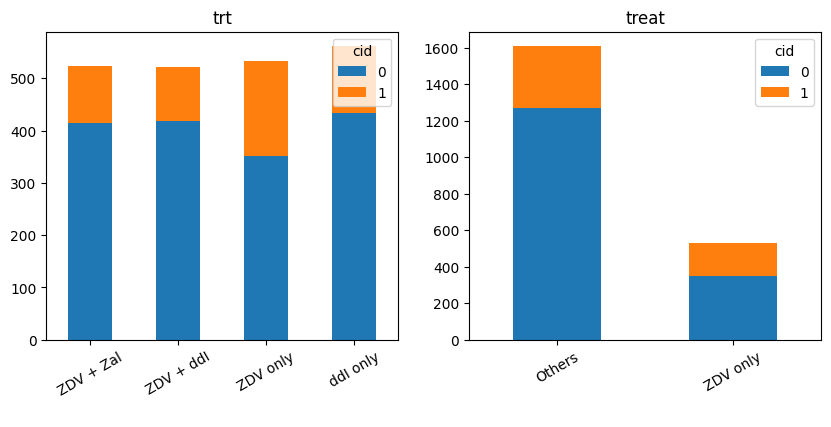

In [12]:
# BAR PLOT OF TREATMENT VARIABLES CLASSIFIED BY RESPONSE VARIABLE (cid)
Z1=Z
Z1=Z1.replace({"trt" : {0:"ZDV only", 1:"ZDV + ddI", 2:"ZDV + Zal", 3:"ddI only"}}).replace( {"treat" : {1 : "Others", 0 : "ZDV only"}})

ncols = 2
col_show = 'cid'
col_subplots = ['trt','treat']

#plot size and number of rows/columns of subplots
nrows=(len(col_subplots) + ncols - 1) // ncols
#fix, axes = plt.subplots(ncols=ncols, nrows=nrows, figsize=(7.5 * ncols, 5 * nrows), sharey=False)
fix, axes = plt.subplots(ncols=2, nrows=1, figsize=(10,4), sharey=False)
axes_it = axes.flat

def plot_data(df, a, b, ax):
    counts = df[[a, b]].value_counts().unstack(a)
    counts.plot.bar(ax=ax, title=col,stacked=True, rot=30)

for col, ax in zip(col_subplots, axes_it):
    plot_data(Z1, col_show, col, ax)
    ax.set_xlabel(' ')

# If number of columns not multiple of ncols, hide remaining axes
for ax in axes_it:
    ax.axis('off')

plt.show()



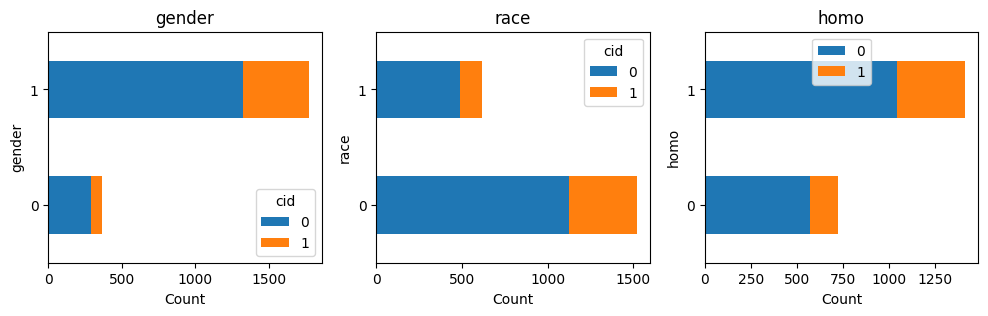

In [ ]:
# BAR PLOT OF DEMOGRAPHIC PREDICTORS CLASSIFIED BY RESPONSE VARIABLE (cid)

col_show = 'cid'
col_subplots = ["gender", "race", "homo"]

#plot size and number of rows/columns of subplots
fix, axes = plt.subplots(ncols=3, nrows=1, figsize=(12,3), sharey=False)
axes_it = axes.flat

def plot_data(df, a, b, ax):
    counts = df[[a, b]].value_counts().unstack(a)
    counts.plot.barh(ax=ax, title=col,stacked=True, rot=0)

for col, ax in zip(col_subplots, axes_it):
    plot_data(Z1, col_show, col, ax)
    ax.set_xlabel('Count')



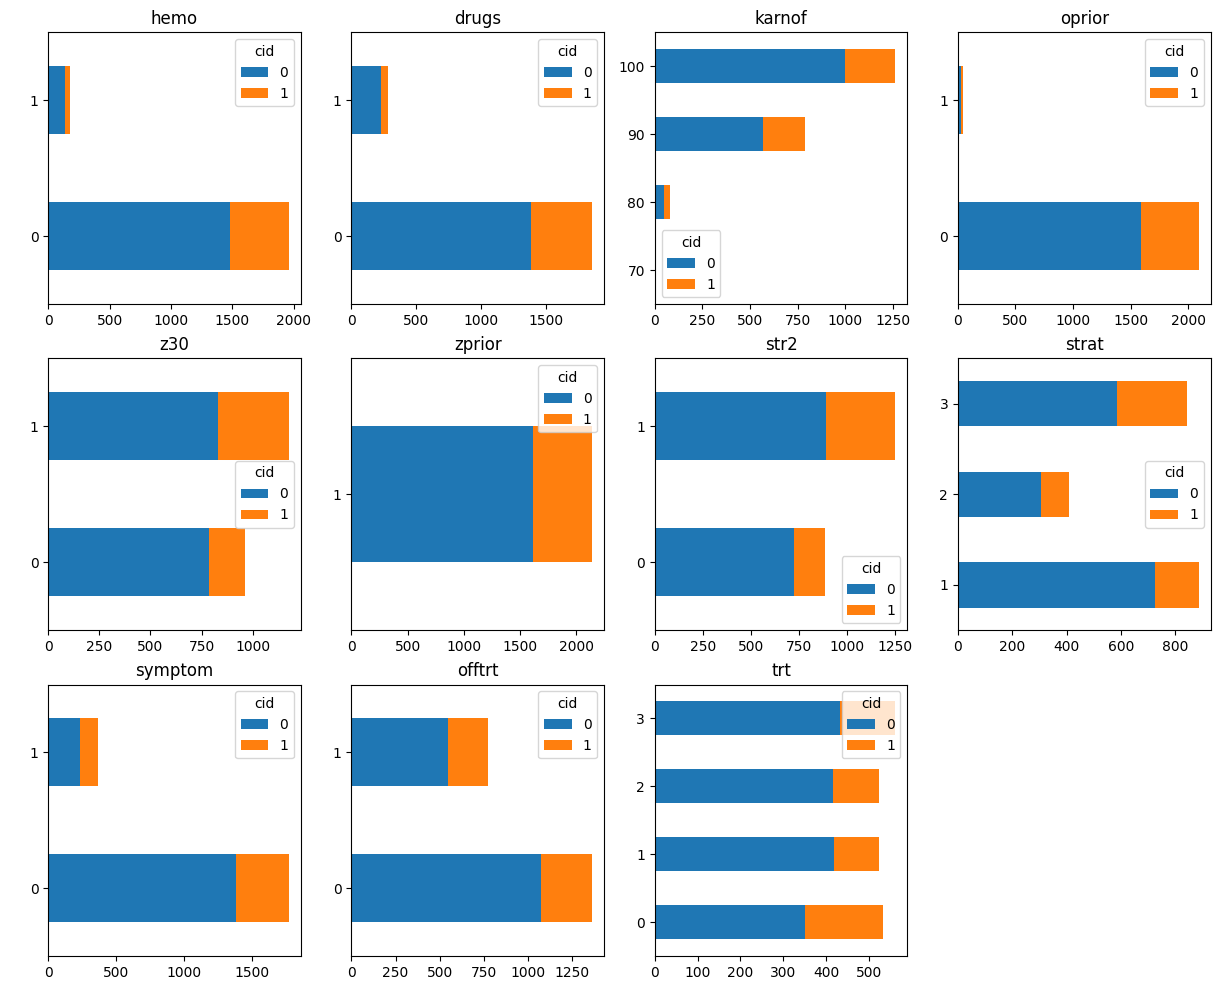

In [ ]:
# BAR PLOT OF MEDICAL HISTORY PREDICTORS CLASSIFIED BY RESPONSE VARIABLE (cid)

col_show = 'cid'
col_subplots = ['hemo','drugs','karnof','oprior','z30','zprior','str2','strat','symptom','offtrt']

#plot size and number of rows/columns of subplots
fix, axes = plt.subplots(ncols=4, nrows=3, figsize=(15,12), sharey=False)
axes_it = axes.flat

def plot_data(df, a, b, ax):
    counts = df[[a, b]].value_counts().unstack(a)
    counts.plot.barh(ax=ax, title=col,stacked=True, rot=0)
    #sns.move_legend(ax,"upper center", bbox_to_anchor=(1, 1))

for col, ax in zip(col_subplots, axes_it):
    plot_data(Z1, col_show, col, ax)
    ax.set_ylabel(' ')

for ax in axes_it:
    ax.axis('off')


In [ ]:
# CHI SQUARE TEST TO DETERMINE THE RELATIONSHIP (P-VALUE) BETWEEN THE RESPONSE AND CATEGORICAL PREDICTOR VARIABLES
import scipy.stats
from scipy.stats import chi2

Z_preds=Z[['trt', 'hemo', 'homo', 'drugs',  'karnof', 'oprior', 'z30', 'zprior',
           'race', 'gender','str2', 'strat', 'symptom', 'treat', 'offtrt']]
Z_resp=Z['cid']


for i, col in enumerate(Z_preds):
    tab_ind=pd.crosstab(Z_resp,Z_preds[col])
    #print('contingency_table :\n',tab_ind)
    chi2_stat, p, dof, expected = scipy.stats.chi2_contingency(tab_ind)
    print(f"p-value between {col} - cid:      {p:.5g}")

p-value between trt - cid:      3.8716e-08
p-value between hemo - cid:      0.67075
p-value between homo - cid:      0.014005
p-value between drugs - cid:      0.025855
p-value between karnof - cid:      4.3534e-05
p-value between oprior - cid:      0.082562
p-value between z30 - cid:      8.7613e-09
p-value between zprior - cid:      1
p-value between race - cid:      0.0113
p-value between gender - cid:      0.043389
p-value between str2 - cid:      1.5533e-08
p-value between strat - cid:      8.931e-09
p-value between symptom - cid:      3.4132e-09
p-value between treat - cid:      2.9604e-09
p-value between offtrt - cid:      2.2165e-05


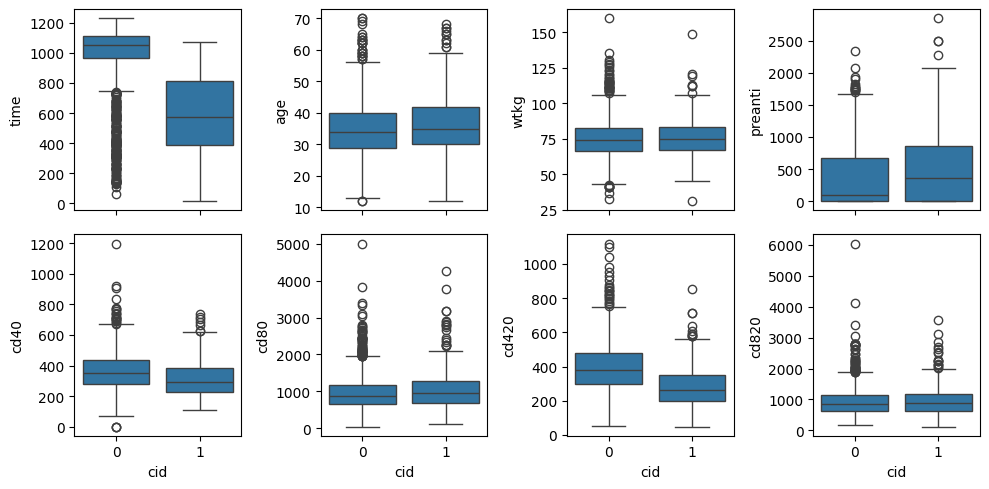

In [15]:
#Generation of box plot to visualize relationship between CID(categorical outcome) and continuous prefdictors

contvars = ["time","age","wtkg","preanti","cd40", "cd80", "cd420", "cd820"]

fig, axes =plt.subplots(2,4, figsize=(10,5), sharex=True)
axes = axes.flatten()

for i, contvar in enumerate(Z[contvars]):
    sns.boxplot(ax=axes[i],data=Z, x='cid', y=Z[contvar])
    #plt.title(f'Boxplot of ')
    #plt.xlabel('Censoring Indicator (cid)')
    #plt.show()

fig.tight_layout()
plt.show()



In [ ]:
# BISERIAL  correlation coefficient and the associated p-value TO DETERMINE THE RELATIONSHIP BETWEEN THE RESPONSE AND CONTINUOUS PREDICTORS

from scipy import stats

for i, contvar in enumerate(Z[contvars]):
  stat=stats.pointbiserialr(Z['cid'], Z[contvar])
  pvalue=stat.pvalue
  corval=stat.statistic
  print(f"{contvar} - cid:    corr_coeff  {corval:.5g}     p-value  {pvalue:.5g}")
  #print(stat)

time - cid:    corr_coeff  -0.57499     p-value  1.6359e-188
age - cid:    corr_coeff  0.070384     p-value  0.0011246
wtkg - cid:    corr_coeff  0.016205     p-value  0.45382
preanti - cid:    corr_coeff  0.12845     p-value  2.4901e-09
cd40 - cid:    corr_coeff  -0.18565     p-value  4.8705e-18
cd80 - cid:    corr_coeff  0.065338     p-value  0.0025002
cd420 - cid:    corr_coeff  -0.34591     p-value  3.628e-61
cd820 - cid:    corr_coeff  0.019494     p-value  0.36752


MAJOR FINDINGS:

There are no missing data. Of the 25 variables in the dataset, PIDNUM will not be excluded from regression/decision tree analysis. It refers to patient ID and is not relevant in prediction tasks.

Predictor Variables contain both continuous and caterorical variables, and can broadly be classified into:
- Demographic Data
- Medical History and Prior Medication data
- Treatment Groups
- Immuno data, pre and post treatment

Since the data contain the mix of both categorical and continous types, it is hard to determine the correlation/collinearity among all the variables. However use of different data visualization methods and tests of  statistical significance provided useful information about relationship between variables: some of the major findings are:
- Among the continuous variables, there is a strong correlation between CD40 and CD420, CD80 and CD820, and TIME and CD420.
- When the response variable (Censoring Indicator, cid) was analyzed against the individual predictors, majority of the combination pairs showed a statistical significance and therefore some correlation between the pairs. These included 'time', 'trt', 'age', 'homo', 'drugs', 'karnof', 'oprior', 'z30', 'preanti', 'race', 'gender', 'str2', 'strat', 'symptom', 'treat', 'offtrt', 'cd40', 'cd420'  and 'cd80'.
       
